In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io


Upload et importation des données sur Google Colab


In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
#data = pd.read_csv(io.BytesIO(uploaded['Walmart Data Set Final Version 2.1.csv']))
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IA/Walmart_Sales_DataSet.csv")

# **Lecture du jeux de données et analyse**

Lecture du jeux de données

---



In [ ]:
data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,Store1,Dept1,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50
1,Store1,Dept2,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,50605.27
2,Store1,Dept3,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,13740.12
3,Store1,Dept4,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,39954.04
4,Store1,Dept5,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,32229.38


Description des données exclusivement différentes de NaN

In [ ]:
data.describe() 

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales
count,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,15981.258123
std,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,22711.183519
min,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,-4988.940000
25%,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2079.650000
50%,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,7612.030000
75%,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,20205.852500
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,693099.360000


Détermination des données numériques et catégoriques

In [ ]:
numeric_var = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object','bool']]

# Valeurs numériques
train_num=data[numeric_var]

# Valeurs catégoriques
train_cat=data[cat_var]


In [ ]:
print (numeric_var)
print (cat_var)

['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Weekly_Sales']
['Store', 'Dept', 'Date', 'IsHoliday', 'Type']


**Remplacement des valeurs catégoriques par des valeurs numériques**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb_enc = LabelEncoder()
data['Dept_code'] = lb_enc.fit_transform(data['Dept']) # Creation d'une nouvelle colonne 'Dept_code' qui prendra les valeurs numériques de 'Dept'
data['Store_code'] = lb_enc.fit_transform(data['Store'])
data['Type_code'] = lb_enc.fit_transform(data['Type'])

data['Dept_code'].head()


0     0
1    10
2    21
3    32
4    43
Name: Dept_code, dtype: int64

In [ ]:
data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales,Dept_code,Store_code,Type_code
0,Store1,Dept1,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50,0,0,0
1,Store1,Dept2,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,50605.27,10,0,0
2,Store1,Dept3,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,13740.12,21,0,0
3,Store1,Dept4,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,39954.04,32,0,0
4,Store1,Dept5,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,32229.38,43,0,0


**Conversion de la colonne 'Date' et création de nouvelles colonnes 'Jour', 'Mois' et 'Année' **

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']
# On peut voir ci-dessous l'évolution. '02/05/2010' -> '2010-02-05'

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [ ]:
# Création des nouvelles colonnes 
data['Date_month'] =data['Date'].dt.month 
data['Date_year'] =data['Date'].dt.year
data['Date_day'] =data['Date'].dt.day

In [ ]:
data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales,Dept_code,Store_code,Type_code,Date_month,Date_year,Date_day
0,Store1,Dept1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50,0,0,0,2,2010,5
1,Store1,Dept2,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,50605.27,10,0,0,2,2010,5
2,Store1,Dept3,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,13740.12,21,0,0,2,2010,5
3,Store1,Dept4,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,39954.04,32,0,0,2,2010,5
4,Store1,Dept5,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,32229.38,43,0,0,2,2010,5


**Checking des valeurs manquantes**

In [ ]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Weekly_Sales         0
Dept_code            0
Store_code           0
Type_code            0
Date_month           0
Date_year            0
Date_day             0
dtype: int64

D'après le résultat ci-dessus, seulement les MarkDown possèdent des valeurs manquantes.
Ex: pour MarkDown1, on peut voir qu'il y a un total de 270 889 valeurs Null (NA / NaN)


**Remplir les valeurs manquantes avec des 0**

In [ ]:
data.fillna(0,inplace= True) 
# fillna remplace toutes les valeurs 'Na' ou 'NaN' dans les data par la valeur qu'on applique
# inplace remplace directement dans 'data' (sans ca, la modif n'est pas définitive)

In [ ]:
# check up pour voir si la correction s'est bien faite.
data.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Weekly_Sales    0
Dept_code       0
Store_code      0
Type_code       0
Date_month      0
Date_year       0
Date_day        0
dtype: int64

**Visualisation de la matrice de corrélation pour déterminer les facteurs les plus corréler au weekly sales**

In [ ]:
import seaborn as sns

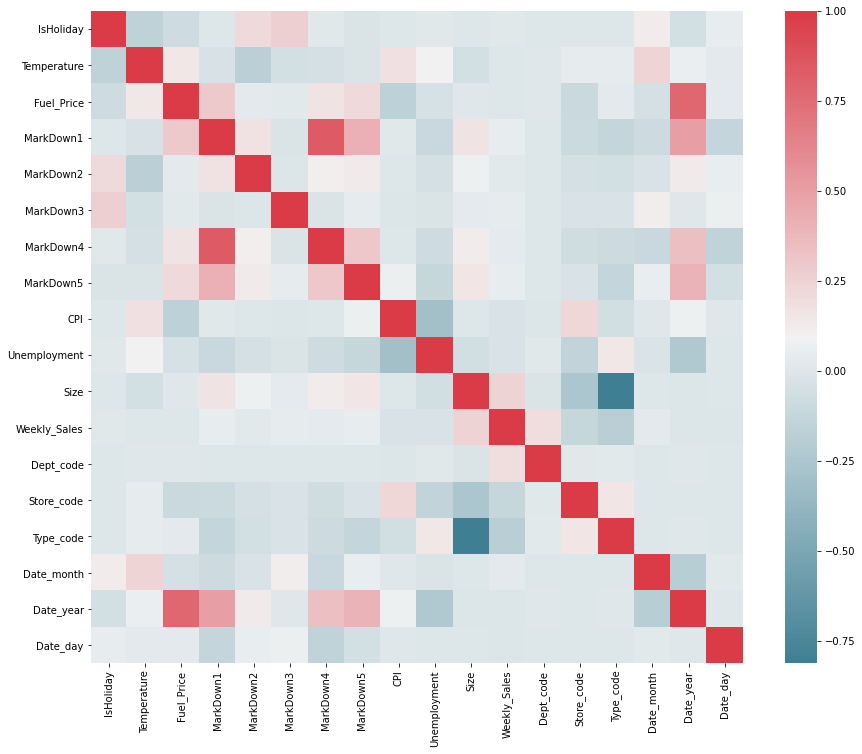

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

D'après la Matrice de Corrélation ci-dessus, on déduit que les Weekly_Sales sont les plus affectées par :                                    
'Size' -> taille du magasin                                                                     
'Dept_code' -> valeur numérique de Dept, département du magasin.

Notre analyse portera sur l'attribut 'Size', qui me semble plus objectif que le département.

**Affichage des weekly sales**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


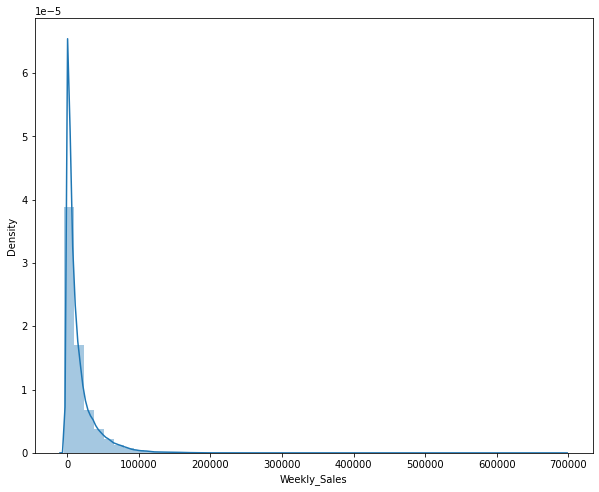

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
sns.distplot(data.Weekly_Sales,ax=ax)

**Comparaison Weekly Sales VS Size**

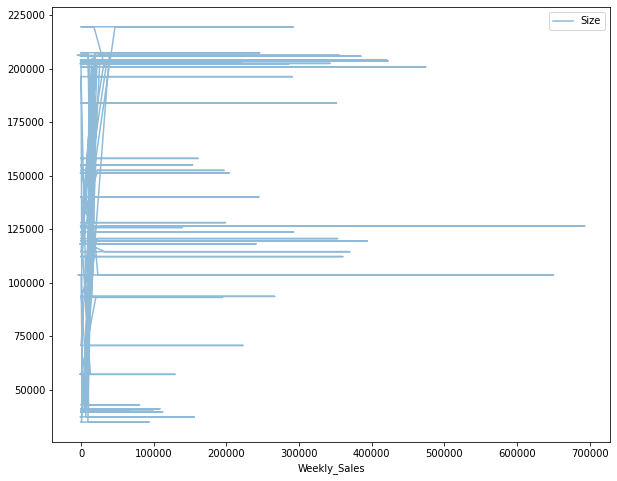

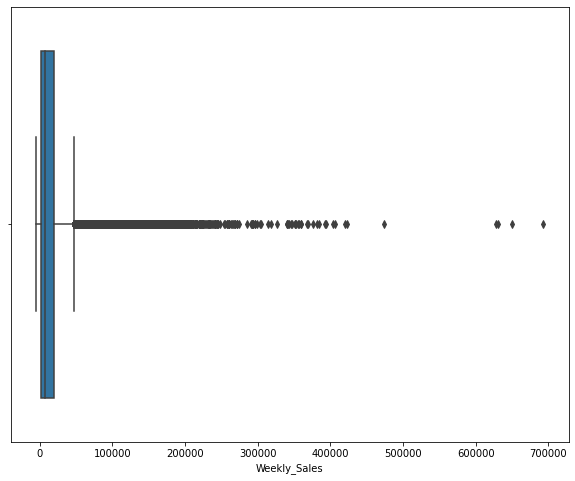

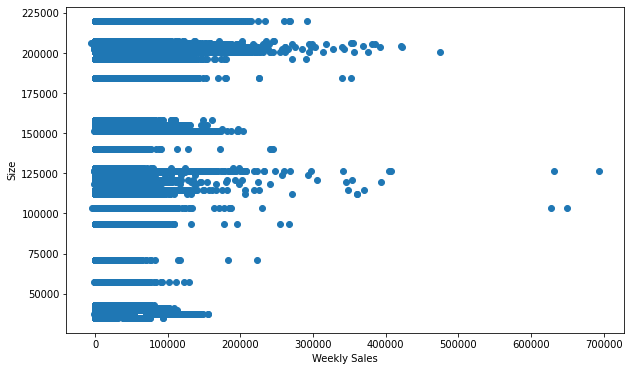

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
data.plot(kind='line', x='Weekly_Sales', y='Size', alpha=1.5,ax=ax)

g,bx = plt.subplots(figsize=(10, 8))
sns.boxplot(x=data['Weekly_Sales'],ax=bx)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Weekly_Sales'], data['Size'])
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Size')
plt.show()

D'après les graphes ci-dessus, on peut voir que le plus gros de data en "Weekly Sales" sont regroupées avant 200 000, le rest est négligeable voir abérrant.
Par la suite, nous nous focuserons sur les data < 100 000.

**Traitement des données - Suppression de données non pertinentes**

In [ ]:
data.Weekly_Sales=np.where(data.Weekly_Sales>200000, 200000,data.Weekly_Sales)


In [ ]:
data.describe()
# On peut vérifier dans la colonne Weekly_Sales

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales,Dept_code,Store_code,Type_code,Date_month,Date_year,Date_day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,15956.287893,39.093652,21.336200,0.589912,6.449510,2010.968591,15.673131
std,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,22409.488712,24.460010,13.084379,0.666337,3.243217,0.796876,8.753549
min,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,-4988.940000,0.000000,0.000000,0.000000,1.000000,2010.000000,1.000000
25%,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,2079.650000,17.000000,10.000000,0.000000,4.000000,2010.000000,8.000000
50%,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,7612.030000,38.000000,21.000000,0.000000,6.000000,2011.000000,16.000000
75%,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,20205.852500,62.000000,33.000000,1.000000,9.000000,2012.000000,23.000000
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,200000.000000,80.000000,44.000000,2.000000,12.000000,2012.000000,31.000000


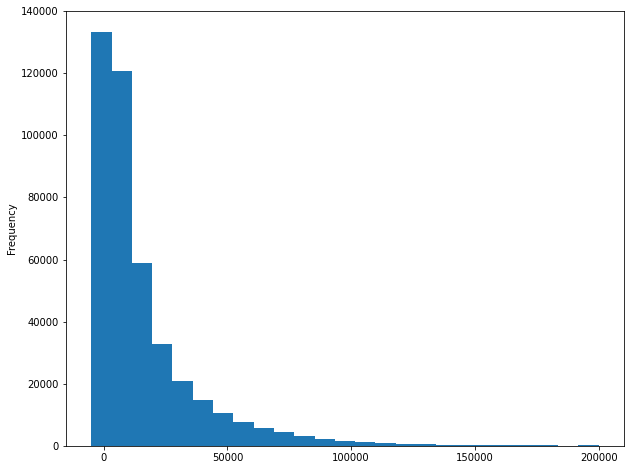

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
data.Weekly_Sales.plot.hist(bins=25,ax=ax)

D'apres les resultats ci dessus, on peut, pour encore plus de précisions, supprimer les data > 100 000

In [ ]:
data.Weekly_Sales=np.where(data.Weekly_Sales>100000, 100000,data.Weekly_Sales)

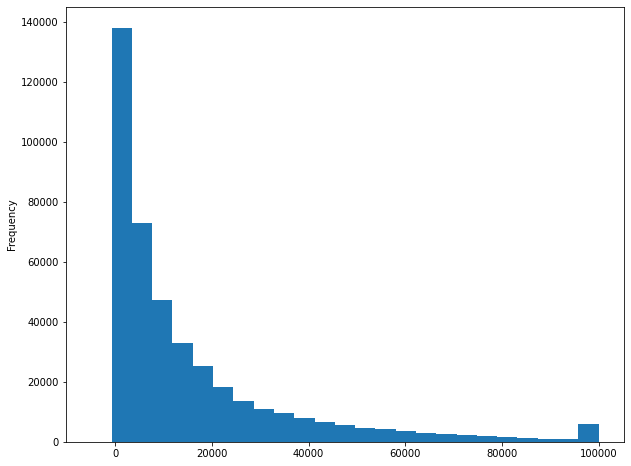

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
data.Weekly_Sales.plot.hist(bins=25,ax=ax)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Dept          421570 non-null  object        
 2   Date          421570 non-null  datetime64[ns]
 3   IsHoliday     421570 non-null  bool          
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     421570 non-null  float64       
 7   MarkDown2     421570 non-null  float64       
 8   MarkDown3     421570 non-null  float64       
 9   MarkDown4     421570 non-null  float64       
 10  MarkDown5     421570 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  Type          421570 non-null  object        
 14  Size          421570 non-null  int64         
 15  Weekly_Sales  421

**Correction ou Suppression des Dtype non numeric**

In [ ]:
type_mapping = {False: 0, True: 1}
data['IsHoliday'] = data['IsHoliday'].map(type_mapping)

In [ ]:
data.drop(['Store','Dept','Date','Type'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IsHoliday     421570 non-null  int64  
 1   Temperature   421570 non-null  float64
 2   Fuel_Price    421570 non-null  float64
 3   MarkDown1     421570 non-null  float64
 4   MarkDown2     421570 non-null  float64
 5   MarkDown3     421570 non-null  float64
 6   MarkDown4     421570 non-null  float64
 7   MarkDown5     421570 non-null  float64
 8   CPI           421570 non-null  float64
 9   Unemployment  421570 non-null  float64
 10  Size          421570 non-null  int64  
 11  Weekly_Sales  421570 non-null  float64
 12  Dept_code     421570 non-null  int64  
 13  Store_code    421570 non-null  int64  
 14  Type_code     421570 non-null  int64  
 15  Date_month    421570 non-null  int64  
 16  Date_year     421570 non-null  int64  
 17  Date_day      421570 non-null  int64  
dtypes: f

On peut voir ci dessus que toutes les valeurs categoriques ont été supprimées ou corrigées.

# **Création des modèles de prédiction**

**Séparation des données - Phase 1 : Splitting Train / Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales,Dept_code,Store_code,Type_code,Date_month,Date_year,Date_day
0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,24924.50,0,0,0,2,2010,5
1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,50605.27,10,0,0,2,2010,5
2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,13740.12,21,0,0,2,2010,5
3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,39954.04,32,0,0,2,2010,5
4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,32229.38,43,0,0,2,2010,5


In [ ]:
X=data.drop(['Weekly_Sales'], axis=1)

y=data['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# **Multiple Linear Regression** 

In [ ]:
from sklearn.linear_model import LinearRegression

**Entrainement du modèle**

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train) # Entrainement du modèle

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_linear=mlr.predict(X_test) # Prediction sur le jeux de test

**Accuracy du modèle entrainé**

In [ ]:
acc_linear = mlr.score(X_train, y_train) * 100

MSE, RMSE, Accuracy du modèle sur le jeux de test

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred_linear)
r_squared = r2_score(y_test, y_pred_linear) * 100
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 375436208.6479804
Root_Mean_Squared_Error : 19376.17631649703
r_square_value : 10.934082007628243


# **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Entrainement du modèle**

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Accuracy du modèle**

In [ ]:
acc_rf = rf.score(X_train, y_train) * 100
print(acc_rf)

99.71086669538651


**Prédicton du modèle**

In [ ]:
y_pred_rf=rf.predict(X_test)

prediction_rf = pd.DataFrame({
        "Store": X_test.Store_code.astype(str),"Departement":X_test.Dept_code.astype(str),"Date": X_test.Date_year.astype(str)
    +'-' + X_test.Date_month.astype(str) + '-' +  X_test.Date_day.astype(str),
        "Weekly_Sales": y_pred_rf
    })

# on stock les résultats dans un CSV
prediction_rf.to_csv('prediction des weekly sales avec randomforest.csv', index=False)

In [ ]:
prediction_rf.head()

,Store,Département,Date,Weekly_Sales
233571,16,67,2011-11-18,3456.0418
88992,1,76,2010-6-18,88757.2046
367842,32,69,2011-12-16,7350.0586
184359,10,10,2012-1-13,47096.9796
26175,22,27,2011-10-28,1270.6146


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

**Entrainement du modèle**

In [ ]:
dt = DecisionTreeRegressor()
dt . fit(X_train, y_train)
# le modèle a été bien plus rapide que RandomForest

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**Accuracy du modèle**

In [ ]:
acc_dt= dt.score(X_train, y_train) * 100
print(acc_dt)
# Joli score

100.0


**Prédiction du modèle**

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
prediction_dt = pd.DataFrame({
        "Store": X_test.Store_code.astype(str),"Departement":X_test.Dept_code.astype(str),"Date": X_test.Date_year.astype(str)
    +'-' + X_test.Date_month.astype(str) + '-' +  X_test.Date_day.astype(str),
        "Weekly_Sales": y_pred_rf
    })


# on stock les résultats dans un CSV
prediction_dt.to_csv('prediction des weekly sales avec decision tree.csv', index=False)

In [ ]:
prediction_dt.head()

,Store,Departement,Date,Weekly_Sales
233571,16,67,2011-11-18,3456.0418
88992,1,76,2010-6-18,88757.2046
367842,32,69,2011-12-16,7350.0586
184359,10,10,2012-1-13,47096.9796
26175,22,27,2011-10-28,1270.6146


# **Comparaison des modèles entrainés**

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.000000
1,Random Forest,99.710867
0,Linear Regression,10.884106


**Conclusion**

Decision Tree l'emporte sur RandomeForest de peu, les résultats seront hautement similaires quoiqu'il arrive.

Il n'y aurait plus qu'à importer des données sur lesquels on souhaite prédire les ventes en fonction de la taille du magasin et du département (avec du traitement avant certainement).